In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv("gbm-data.csv")

In [18]:
y = data["Activity"]
X = data.drop("Activity", axis=1)

In [19]:
X.head(10)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
5,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,0.330917,...,0,0,0,0,0,0,0,0,0,0
6,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,0.252416,...,0,0,0,0,0,0,0,0,0,0
7,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,0.337262,...,0,0,1,0,1,0,0,0,0,0
8,0.000000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,0.215476,...,0,0,0,0,0,0,0,0,0,0
9,0.100000,0.768150,0.10,0.25,0.262299,0.598972,0.377065,0.394514,0.673797,0.343472,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [22]:
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
results = []

In [23]:
for lr in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    clf.fit(X_train, y_train)

    # Списки для сохранения значений log-loss на каждой итерации
    train_loss = []
    test_loss = []

    for y_pred_train, y_pred_test in zip(clf.staged_decision_function(X_train), clf.staged_decision_function(X_test)):
        y_pred_train_transformed = 1 / (1 + np.exp(-y_pred_train))
        loss_train = log_loss(y_train, y_pred_train_transformed)
        train_loss.append(loss_train)

        y_pred_test_transformed = 1 / (1 + np.exp(-y_pred_test))
        loss_test = log_loss(y_test, y_pred_test_transformed)
        test_loss.append(loss_test)

    # Находим минимальное значение метрики и номер итерации
    min_test_loss = min(test_loss)
    iteration_at_min_loss = test_loss.index(min_test_loss) + 1  # +1, так как индексация с 0
    results.append((lr, train_loss, test_loss, min_test_loss, iteration_at_min_loss))

      Iter       Train Loss   Remaining Time 
         1           1.0190           13.69s
         2           0.9192           13.52s
         3           0.8272           13.26s
         4           0.7834           13.04s
         5           0.7109           13.03s
         6           0.6368           12.93s
         7           0.5797           12.91s
         8           0.5610           12.74s
         9           0.5185           12.72s
        10           0.4984           12.58s
        20           0.1999           12.39s
        30           0.1313           12.17s
        40           0.0790           11.59s
        50           0.0511           10.87s
        60           0.0352           10.23s
        70           0.0245            9.61s
        80           0.0162            9.03s
        90           0.0114            8.47s
       100           0.0077            7.92s
       200           0.0002            2.59s
      Iter       Train Loss   Remaining Time 
        

In [24]:
import matplotlib.pyplot as plt

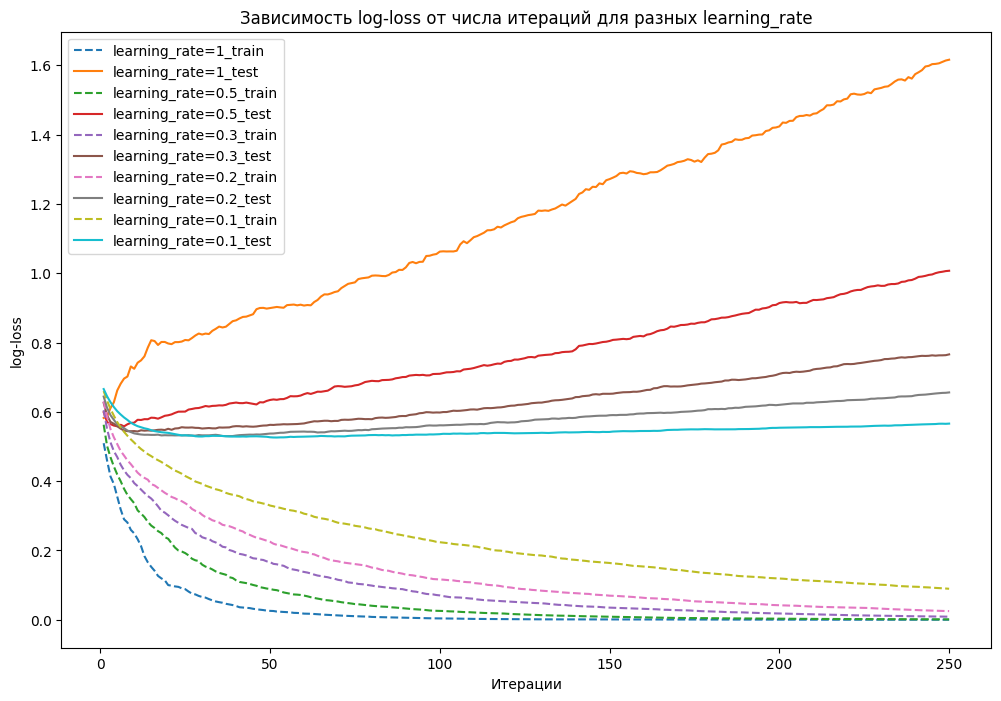

In [25]:
plt.figure(figsize=(12, 8))
for lr, train_loss, test_loss, _, _ in results:
    plt.plot(range(1, 251), train_loss, label=f'learning_rate={lr}_train', linestyle='--')
    plt.plot(range(1, 251), test_loss, label=f'learning_rate={lr}_test')

plt.title('Зависимость log-loss от числа итераций для разных learning_rate')
plt.xlabel('Итерации')
plt.ylabel('log-loss')
plt.legend()
plt.show()

In [26]:
for lr, _, _, min_test_loss, iteration_at_min_loss in results:
    print(f"learning_rate={lr}: Минимальное log-loss = {min_test_loss}, Номер итерации = {iteration_at_min_loss}")

learning_rate=1: Минимальное log-loss = 0.5822942594278475, Номер итерации = 1
learning_rate=0.5: Минимальное log-loss = 0.5580566460434663, Номер итерации = 7
learning_rate=0.3: Минимальное log-loss = 0.5432962175088122, Номер итерации = 11
learning_rate=0.2: Минимальное log-loss = 0.5298828667860297, Номер итерации = 37
learning_rate=0.1: Минимальное log-loss = 0.5258476671782405, Номер итерации = 52


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
best_learning_rate = 0.2
best_iteration = 37  # Номер итерации, на котором достигается наилучшее качество

In [29]:
# Создайте и обучите RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=best_iteration, random_state=241)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=37, random_state=241)

In [30]:
# Получите предсказания вероятностей классов на тестовой выборке
y_pred_proba = rf_classifier.predict_proba(X_test)

In [31]:
# Рассчитайте log-loss на тестовой выборке
log_loss_test = log_loss(y_test, y_pred_proba)
print(f"Значение log-loss на тестовой выборке для RandomForestClassifier: {log_loss_test}")

Значение log-loss на тестовой выборке для RandomForestClassifier: 0.5410941951182815
